In [20]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

**Задание №1**

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Задание №2**

К качечтвенным данным относятся данные из следующих столбцов:
Work_accident,
left,
promotion_last_5years,
department,
salary.
Для этих столбцов будет определятся толтько мода, так как остальный статистические показатели, такие как мин, макс, среднее и т.д. для данных столбцов не имеют никакой значимости.

К количественным данным относятся данные из следующих столбцов:
satisfaction_level,
last_evaluation,
number_project,
average_montly_hours,
time_spend_company.
Для этих столбцов будут определятся следующие статистиченские показатели: максимуму, минимум, среднее, медиана, среднее отклонение.

In [18]:
quantitative_stats = pd.DataFrame()
quantitative_column = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
for i in quantitative_column:
    column = df[i]
    max_ = column.max()
    min_ = column.min()
    mean_ = column.mean()
    median_ = column.median()
    std_ = column.std()
    row = {'max': max_, 'min': min_, 'mean': mean_, 'median': median_, 'std': std_}
    quantitative_stats = pd.concat([quantitative_stats, pd.DataFrame([row])])
quantitative_stats.reset_index(drop=True)

,max,min,mean,median,std
0,1.0,0.09,0.612834,0.64,0.248631
1,1.0,0.36,0.716102,0.72,0.171169
2,7.0,2.00,3.803054,4.00,1.232592
3,310.0,96.00,201.050337,200.00,49.943099
4,10.0,2.00,3.498233,3.00,1.460136


In [19]:
quality_stats = pd.DataFrame()
quality_column = ['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']
for i in quality_column:
    column = df[i]
    mode_ = column.mode()[0]
    row = {'mode': mode_}
    quality_stats = pd.concat([quality_stats, pd.DataFrame([row])])
quality_stats.reset_index(drop=True)

,mode
0,0
1,0
2,0
3,sales
4,low


 **Задание №3**

<AxesSubplot:>

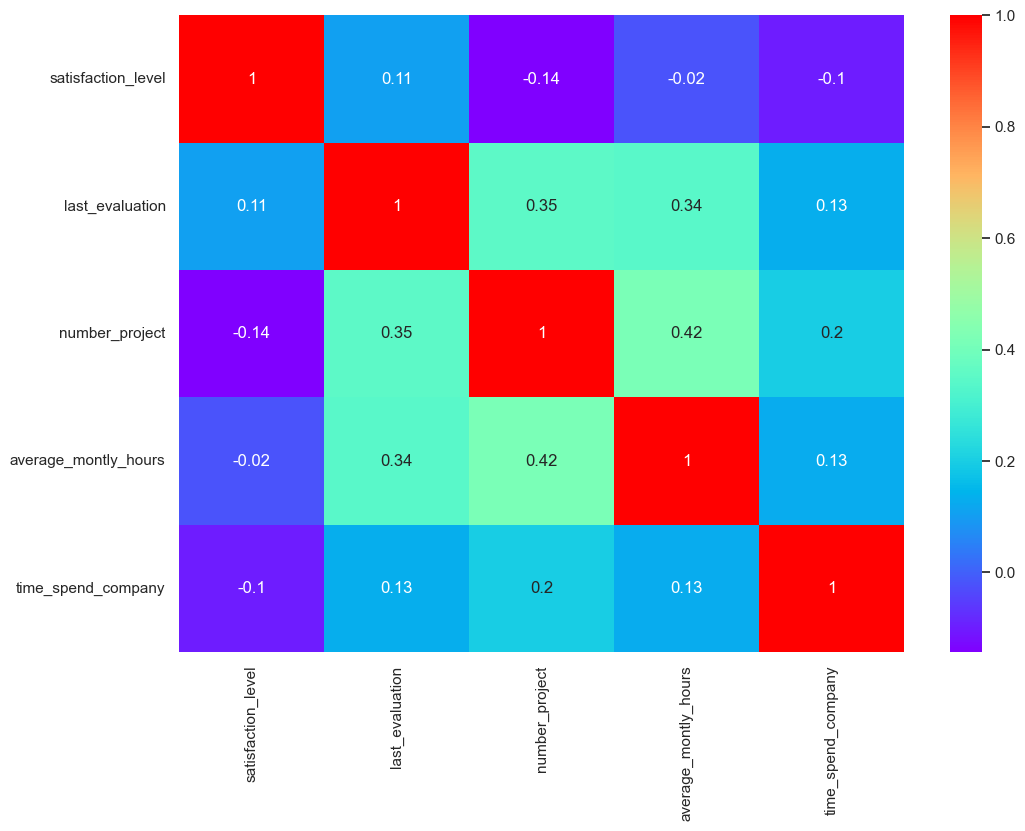

In [25]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(df[quantitative_column].corr(), annot=True, cmap='rainbow')

Наиболее скоррелированные переменные:

number_project (Количество проектов, выполненных за врем работы) и average_montly_hours (Среднее количество часов на рабочем месте в месяц).


number_project (Количество проектов, выполненных за врем работы) и last_evaluation (Время с момента последней оценки в годах).

Наименее скоррелированные переменные:

average_montly_hours (Среднее количество часов на рабочем месте в месяц) и satisfaction_level (Уровень удволетворенности работой).

time_spend_company (Стаж работы в компании в годах) и satisfaction_level (Уровень удволетворенности работой).

**Задание №4**

In [47]:
df_workers = df[df['left'] == 0]
df_grouped = df_workers[['last_evaluation', 'department']].groupby('department').count()
df_grouped.reset_index()

,department,last_evaluation
0,IT,954
1,RandD,666
2,accounting,563
3,hr,524
4,management,539
5,marketing,655
6,product_mng,704
7,sales,3126
8,support,1674
9,technical,2023


**Задание №5**

<AxesSubplot:title={'center':'Распределение работников по уровню их зарплаты'}, xlabel='salary'>

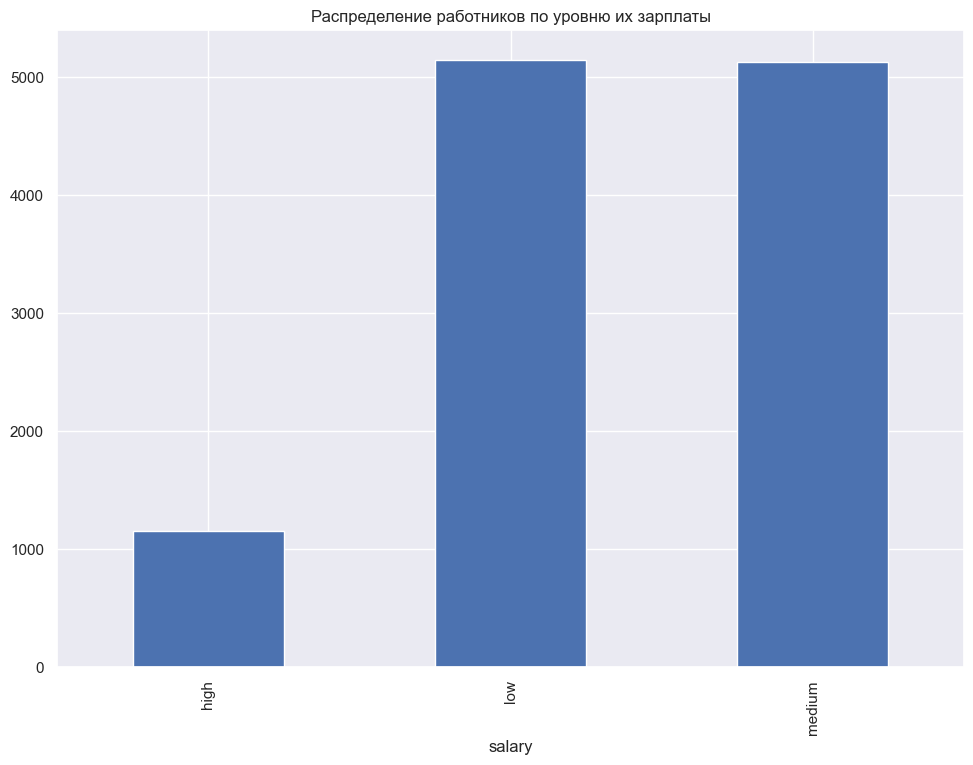

In [66]:
#С учетом того, что некоторые сотрудники уволились
df_salary = df_workers[['salary', 'left']].groupby('salary').count()
df_salary.plot(kind='bar', title='Распределение работников по уровню их зарплаты', legend=None)

**Задание №6**

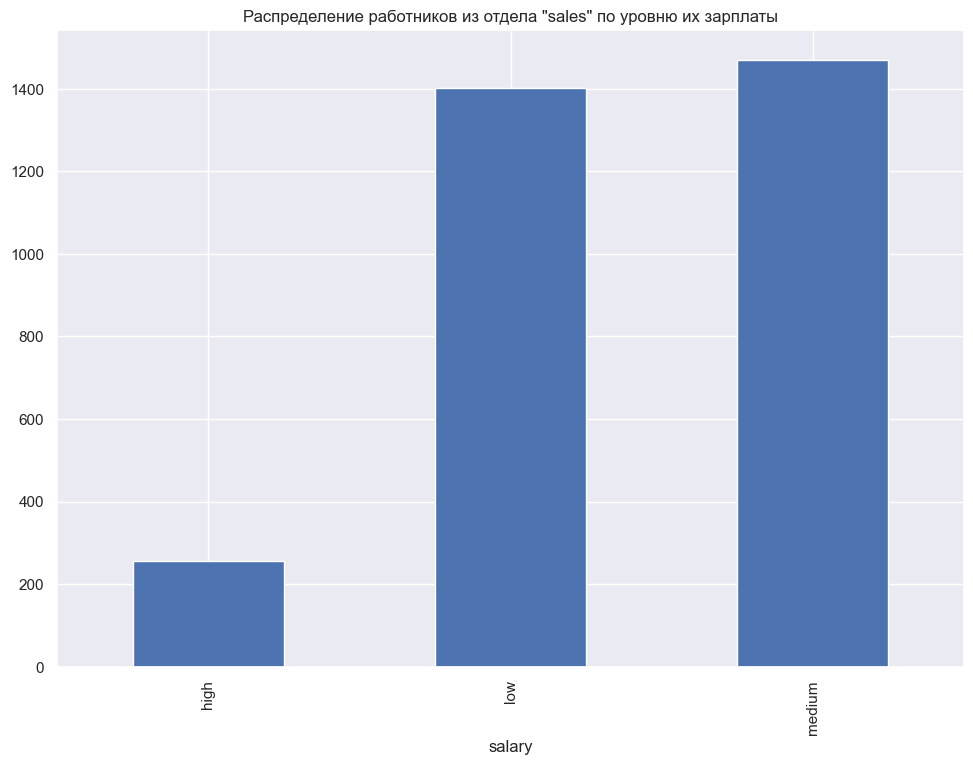

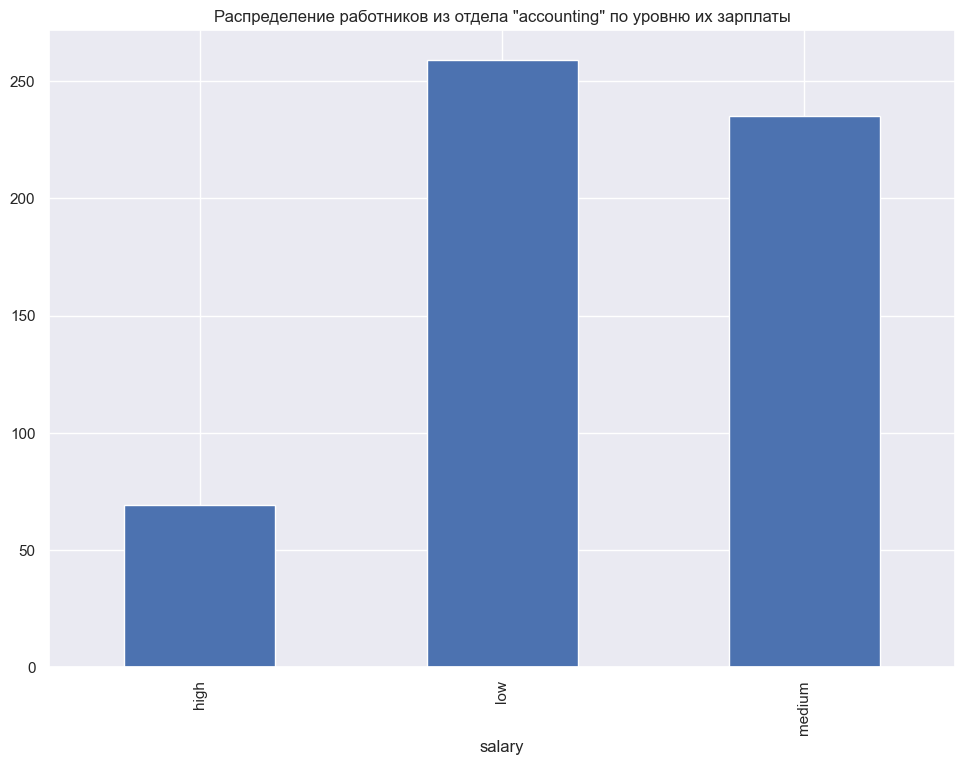

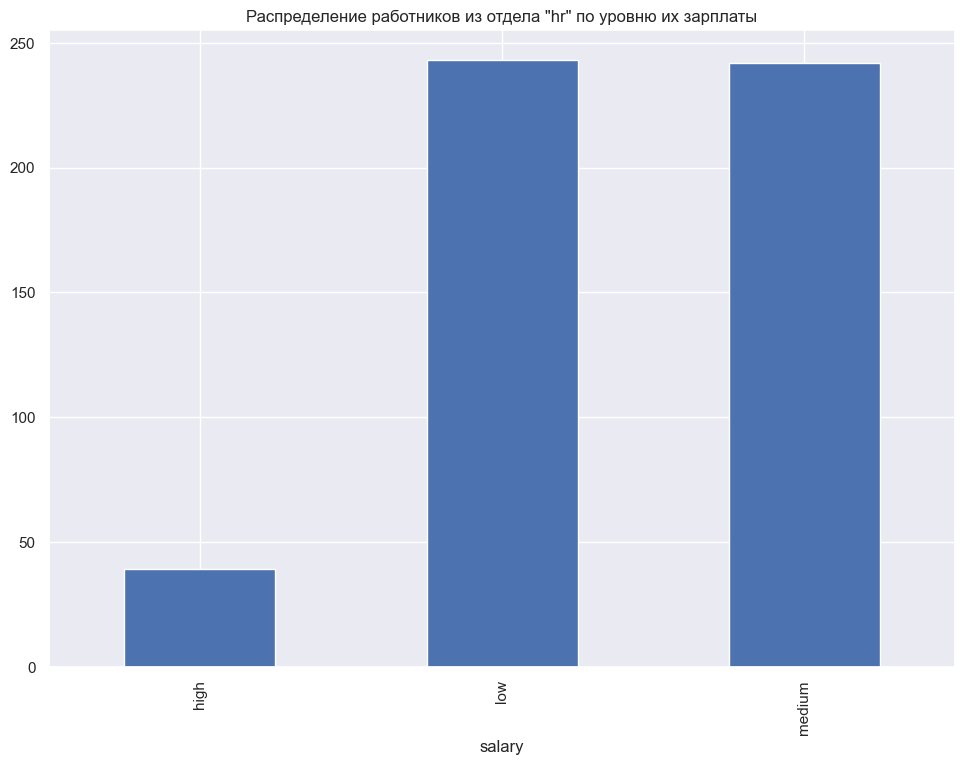

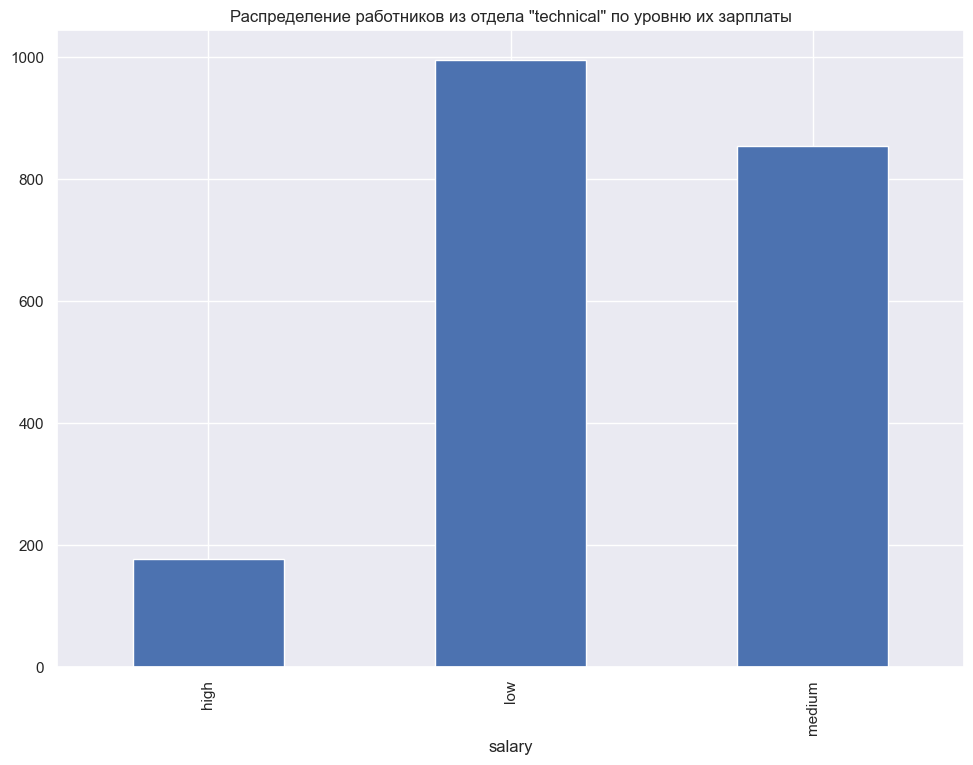

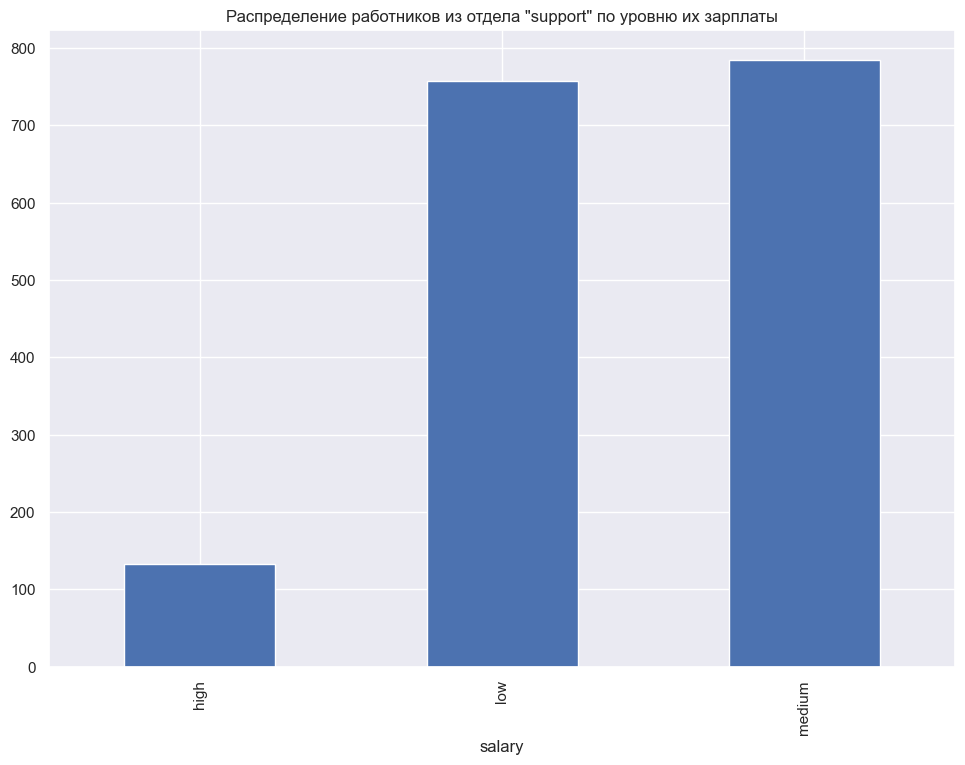

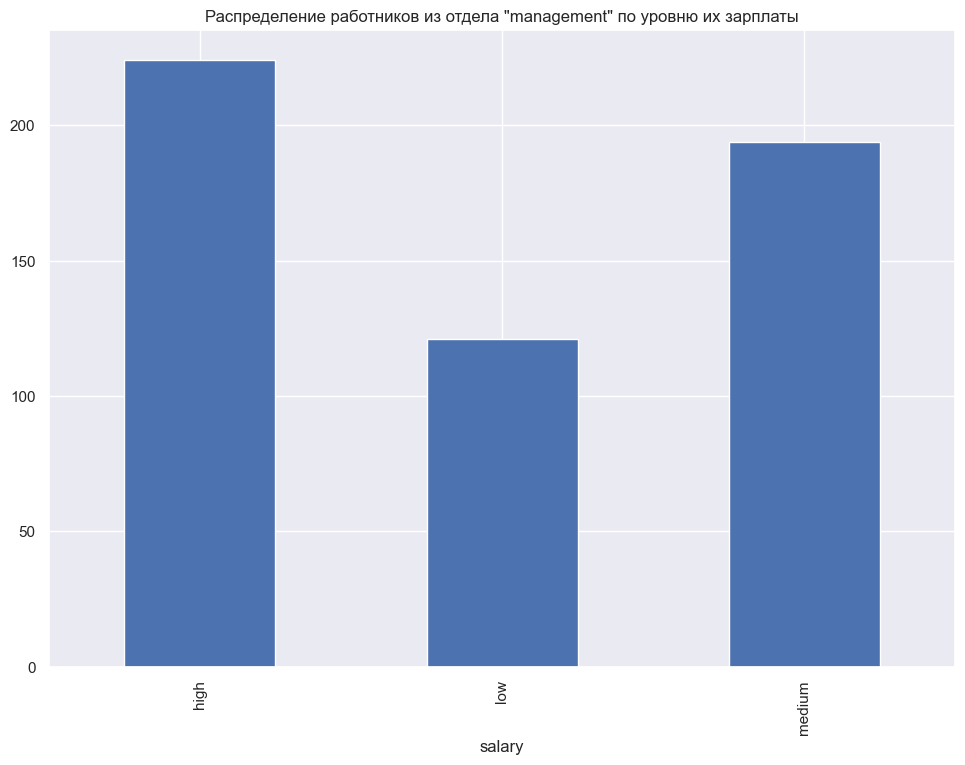

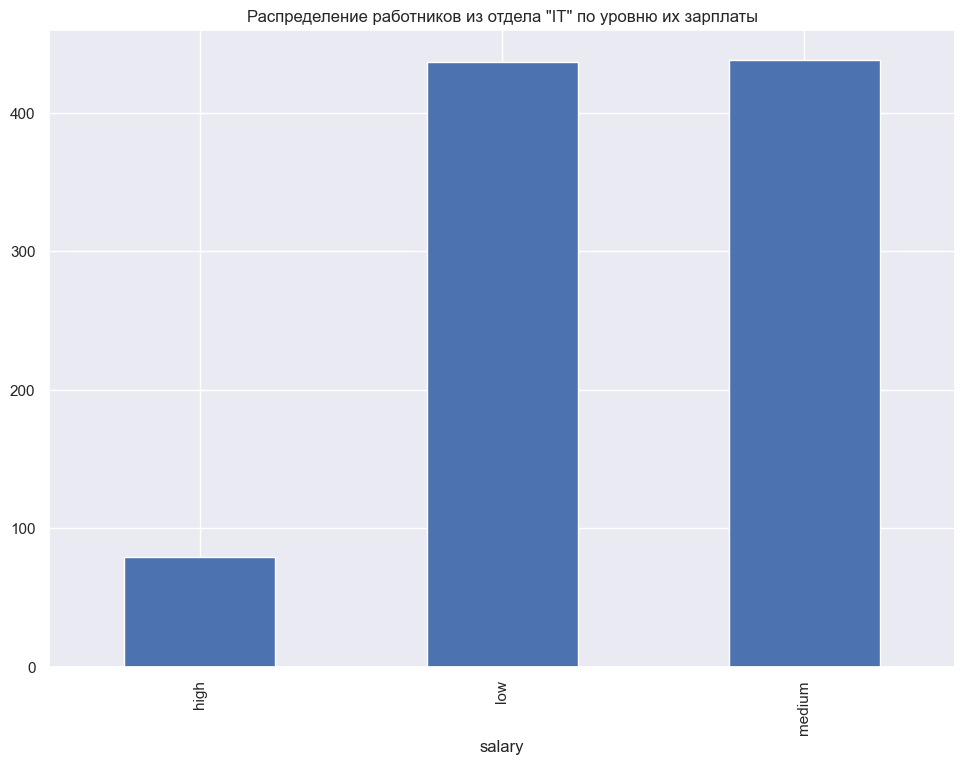

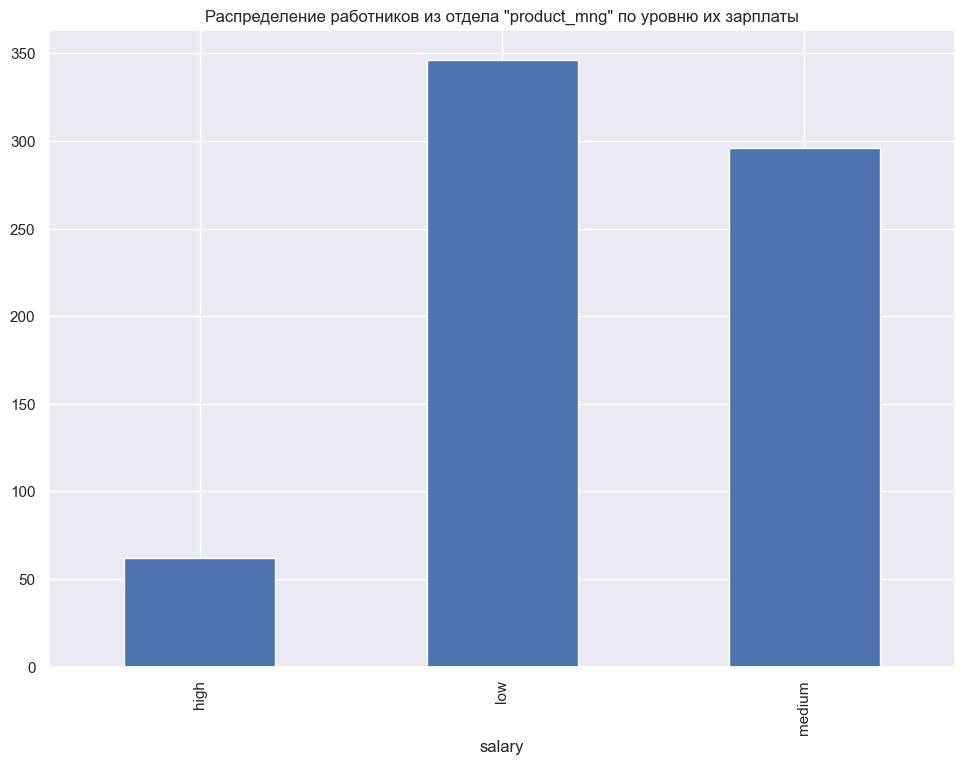

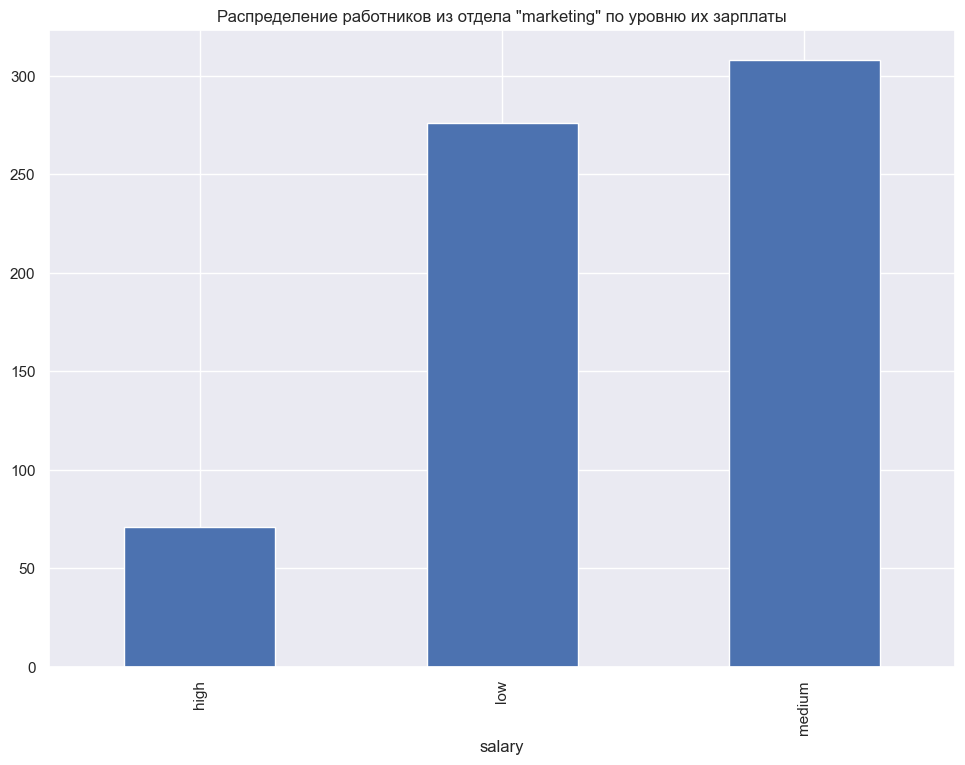

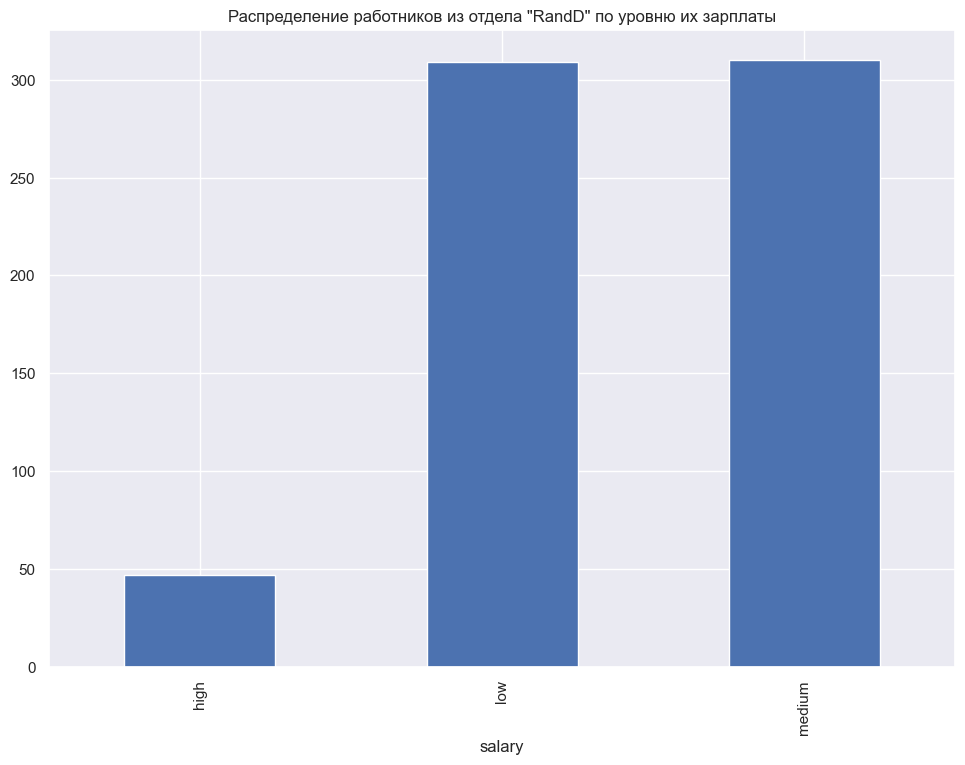

In [69]:
#С учетом того, что некоторые сотрудники уволились
list_of_department = df['department'].unique()
for i in list_of_department:
    df_for_viz = df_workers[df_workers['department'] == i]
    df_salary_viz = df_for_viz[['salary', 'left']].groupby('salary').count()
    df_salary_viz.plot(kind='bar', title=f'Распределение работников из отдела "{i}" по уровню их зарплаты', legend=None)

**Задание №7**

In [73]:
#Используя уровень значимости 0,05 для оценки нулевой и альтернативной гипотез.

#H0 - Cотрудники с высоким окладом проводят на работе столько же времени, 
#как и сотрудники с низким окладом
#H1 - Cотрудники с высоким окладом проводят на работе больше времени, 
#чем сотрудники с низким окладом

#Анализ проводится для всех работников (как уволенных, так и не уволенных)

df_high_salary = df[df['salary'] == 'hight']
df_low_salary = df[df['salary'] == 'low']

stat, p = st.ttest_ind(df_high_salary['average_montly_hours'], df_low_salary['average_montly_hours'])

if p < 0.05:
    print("Отклоняем нулевую гипотезу: Cотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом")
else:
    print("Не отклоняем нулевую гипотезу: Cотрудники с высоким окладом проводят на работе столько же времени, как и сотрудники с низким окладом")

Не отклоняем нулевую гипотезу: Cотрудники с высоким окладом проводят на работе столько же времени, как и сотрудники с низким окладом


**Задание №8**

In [96]:
df_not_dismissed = df[df['left'] == 0] #не уволенные
df_dismissed = df[df['left'] == 1] #уволенные

#Доля сотрудников с повышением за последние 5 лет
promotion_not_dismissed = df_not_dismissed[df_not_dismissed['promotion_last_5years'] == 1]
share_promotion_not_dismissed = (len(promotion_not_dismissed) / len(df_not_dismissed)) * 100

promotion_dismissed = df_dismissed[df_dismissed['promotion_last_5years'] == 1]
share_promotion_dismissed = (len(promotion_dismissed) / len(df_dismissed)) * 100

#Средняя степень удволетворенности
contentment_not_dismissed = df_not_dismissed['satisfaction_level'].mean()
contentment_dismissed = df_dismissed['satisfaction_level'].mean()

#Среднее количество проектов
project_not_dismissed = df_not_dismissed['number_project'].mean()
project_dismissed = df_dismissed['number_project'].mean()

print('Полученные значения для сотрудников, которые не уволились:')
print(f'Доля сотрудников с повышением за последние 5 лет = {round(share_promotion_not_dismissed, 2)};')
print(f'Средняя степень удволетворенности = {round(contentment_not_dismissed, 2)};')
print(f'Среднее количество проектов = {round(project_not_dismissed, 2)}.')
print('\n')
print('Полученные значения для сотрудников, которые уволились:')
print(f'Доля сотрудников с повышением за последние 5 лет = {round(share_promotion_dismissed, 2)};')
print(f'Средняя степень удволетворенности = {round(contentment_dismissed, 2)};')
print(f'Среднее количество проектов = {round(project_dismissed, 2)}.')

Полученные значения для сотрудников, которые не уволились:
Доля сотрудников с повышением за последние 5 лет = 2.63;
Средняя степень удволетворенности = 0.67;
Среднее количество проектов = 3.79.


Полученные значения для сотрудников, которые уволились:
Доля сотрудников с повышением за последние 5 лет = 0.53;
Средняя степень удволетворенности = 0.44;
Среднее количество проектов = 3.86.


**Задание №9**

In [99]:
df_of_left = df['left']
df_of_signs = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
df_of_signs

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [101]:
lda = LinearDiscriminantAnalysis()

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df_of_signs, df_of_left, random_state=42)

In [103]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [104]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_test, lda.predict(X_test))

0.7536

Данное значение показывает, что полученная модель прогнозирует правильный ответ в 75 процентах случаев, что говорит о ее недостаточно хорошей работе, так как в 25 процентах она предсказывает неправильный резульат.